Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [754]:
NAME = "Anjana Tissera"
ID = "123459"

---

# Lab 05: Optimization Using Newton's Method

In this lab, we'll explore an alternative to gradient descent
for nonlinear optimization problems: Newton's method.

## Newton's method in one dimension

Consider the problem of finding the *roots* $\textbf{x}$ of a nonlinear function $f: \mathbb{R}^N \rightarrow \mathbb{R}$. A root of $f$ is a point $\mathbf{x}$ that satisfies $f(\mathbf{x}) = 0$.

In one dimension, Newton's method for finding zeroes works as follows:

1. Pick an initial guess $x_0$

2. Let $x_{i+1} = x_i + \frac{f(x_i)}{f'(x_i)}$

3. If not converged, go to #2.

Convergence occurs when $|f(x_i)| < \epsilon_1$ or when $|f(x_{i+1})-f(x_i)| < \epsilon_2$.

Let's see how this works in practice.

In [755]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

### Example 1: Root finding for cubic polynomial 

In [756]:
def fx(x, p):
    f_x = np.polyval(p, x)
    return f_x

In [757]:
n = 200
x = np.linspace(-3, 3, n)  

# Create the polynomial f(x) = x^3 + x^2 
p = np.poly1d([1, 1, 0, 0]) # [x^3, x^2, x^1, 1]

# Derivative of a polynomial
# This is a convenient method to obtain p_d = np.poly1d([3, 2, 0])
p_d = np.polyder(p)
print('p derivative:', p_d)
print('p derivative:', p_d[2], p_d[1], p_d[0])

# Get values for f(x) and f'(x) for graphing purposes
y = fx(x, p)
y_d = fx(x,p_d)

p derivative:    2
3 x + 2 x
p derivative: 3 2 0


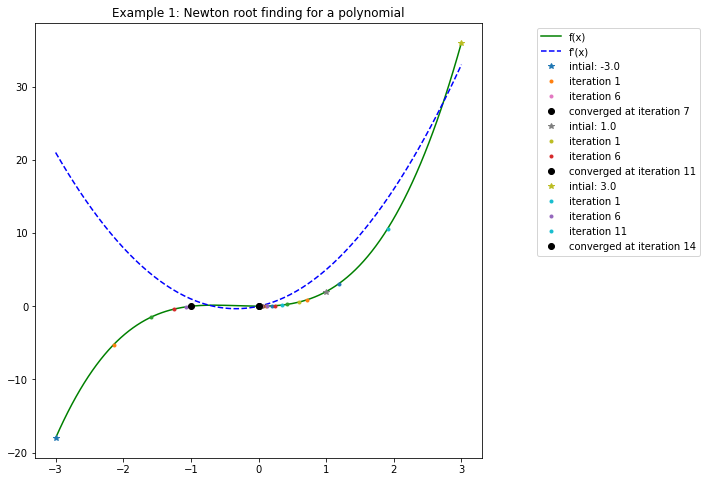

In [758]:
# Try three possible guesses for x0
x0_arr = [-3.0, 1.0, 3.0]
max_iter = 30
threshold = 0.001
roots = []

fig1 = plt.figure(figsize=(8,8)) 
ax = plt.axes()
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label="f\'(x)")

for x0 in x0_arr:
    # Plot initial data point
    plt.plot(x0, fx(x0,p), '*', label='intial: ' + str(x0))    
    i = 0
    while i < max_iter:
        # x1 = x0 - f(x0)/f'(x0)
        x1 = x0 - fx(x0, p) / fx(x0, p_d)
        # Check for delta (x) less than threshold
        if np.abs(x0 - x1) <= threshold:
            roots.append(round(x1,4))
            break;
        # Plot current root after every 5 iterations
        if i % 5 == 0:
            plt.plot(x1, fx(x1, p), '.', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx(x1, p), '.')        
        x0 = x1
        i = i + 1
    plt.plot(x1, fx(x1, p), 'ko', label='converged at iteration '+ str(i+1))

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 1: Newton root finding for a polynomial')

plt.show()

#### Example 2: Root finding for sine function

In [759]:
def fx_sin(x):  
    f_x = np.sin(x)        
    return f_x

def fx_dsin(x):    
    return np.cos(x)

In [760]:
n = 200

x = np.linspace(-np.pi, np.pi, n)  

# Get f(x) and f'(x) for plotting
y = fx_sin(x)
y_d = fx_dsin(x)

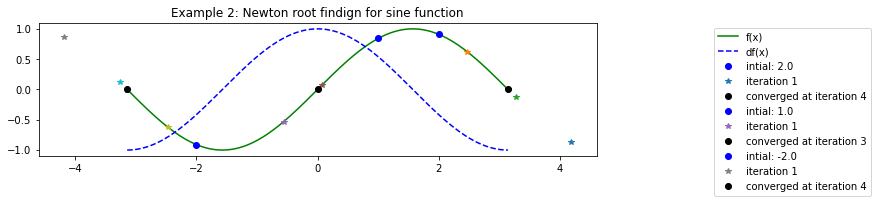

Roots: 3.141593, 0.000000, -3.141593


In [761]:
# Consider three possible starting points
x0_arr = [2.0, 1.0, -2.0]
max_iter = 30
i = 0
threshold = 0.01
roots = []

fig1 = plt.figure(figsize=(10,10)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.plot(x, y, 'g-', label='f(x)')
plt.plot(x, y_d, 'b--', label='df(x)')

for x0 in x0_arr:
    plt.plot(x0, fx_sin(x0), 'bo', label='intial: ' + str(x0))
    i = 0;
    while i < max_iter:
        x1 = x0 - fx_sin(x0) / fx_dsin(x0)
        if np.abs(x0 - x1) <= threshold:
            roots.append(x1)
            plt.plot(x1,fx_sin(x1),'ko',label='converged at iteration '+ str(i))
            break;
        if i % 5 == 0:
            plt.plot(x1, fx_sin(x1), '*', label='iteration '+ str(i+1))
        else:
            plt.plot(x1, fx_sin(x1), '*')        
        x0 = x1
        i = i + 1

plt.legend(bbox_to_anchor=(1.5, 1.0), loc ='upper right')
plt.title('Example 2: Newton root findign for sine function')

plt.show()

print('Roots: %f, %f, %f' % (roots[0], roots[1], roots[2]))


## Newton's method for optimization

Now, consider the problem of minimizing a scalar function $J : \mathbb{R}^n \mapsto \mathbb{R}$.
We would like to find
$$ \theta^* = \text{argmin}_\theta J(\theta) $$
We already know gradient descent:
$$ \theta^{(i+1)} \leftarrow \theta^{(i)} - \alpha \nabla_J(\theta^{(i)}).$$
But Newton's method gives us a potentially faster way to find $\theta^*$ as a zero of
the system of equations
$$\nabla_J(\theta^*) = \mathbf{0}.$$

In one dimension, to find the zero of $f'(x)$, obviously, we would apply Newton's method
to $f'(x)$, obtaining the iteration
$$x_{i+1} = x_i - f'(x_i) / f''(x_i).$$
The multivariate extension of Newton's optimization method is
$$\mathbf{x}_{i+1} = \mathbf{x}_i - \mathtt{H}_f(\mathbf{x}_i)^{-1} \nabla_f(\mathbf{x}_i),$$
where $\mathtt{H}_f(\mathbf{x})$ is the *Hessian* of $f$ evaluated at $\textbf{x}$:
$$\mathtt{H}_f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 x_n} \\
\frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}
\end{bmatrix}$$

This means, for the minimization of $J(\theta)$, we would obtain the update rule
$$\theta^{(i+1)} \leftarrow \theta^{(i)} - \mathtt{H}_J(\theta^{(i)})^{-1} \nabla_J(\theta^{(i)}).$$


## Application to logistic regression

Let's create some difficult sample data as follows:

**Class 1:** Two features $x_1$ and $x_2$ jointly distributed as a two-dimensional spherical Gaussian with parameters

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

**Class 2:** Two features $x_1$ and $x_2$ in which the data are generated by first sampling an angle $\theta$ according to a uniform distribution, sampling a distance $d$ according to a one-dimensional Gaussian with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$, then outputting the point $$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

Generate 100 samples for each of the classes.

### Exercise 1.1 (5 points)

Generate data for class 1 with 100 samples

$$\mu = \begin{bmatrix} x_{1c} \\ x_{2c} \end{bmatrix},
\Sigma = \begin{bmatrix} \sigma_1^2 & 0 \\ 0 & \sigma_1^2 \end{bmatrix}.$$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html">numpy.random.multivariate_normal</a> to generate samples.
</details>

In [762]:
mu_1 = np.array([1.0, 2.0])
sigma_1 = 1
num_sample = 100

cov_mat = None
X1 = None

# YOUR CODE HERE
cov_mat = np.matrix([[np.square(sigma_1),0],[0,np.square(sigma_1)]])
X1 = np.random.multivariate_normal(mean= mu_1, cov=cov_mat, size = num_sample)

In [763]:
print(X1[:5])

# Test function: Do not remove
assert X1.shape == (100, 2), 'Size of X1 is incorrect'
assert cov_mat.shape == (2, 2), 'Size of x_test is incorrect'
count = 0 
for i in range(2):
    for j in range(2):
        if i==j and cov_mat[i,j] != 0:
            if cov_mat[i,j] == sigma_1:
                count += 1
        else:
            if cov_mat[i,j] == 0:
                count += 1
assert count == 4, 'cov_mat data is incorrect'

print("success!")
# End Test function

[[1.77895334 3.03257652]
 [2.56439382 0.8162735 ]
 [0.34233645 2.66744676]
 [0.91703851 3.63554527]
 [0.44508746 2.85485235]]
success!


**Expect result (or looked alike):**\
[[-0.48508229  2.65415886]\
 [ 1.17230227  1.61743589]\
 [-0.61932146  3.53986541]\
 [ 0.70583088  1.45944356]\
 [-0.93561505  0.2042285 ]]

### Exercise 1.2 (5 points)

Generate data for class 2 with 100 samples

$$\textbf{x} = \begin{bmatrix} x_{1c} + d \cos\theta \\ x_{2c} + d \sin\theta \end{bmatrix}$$.

with a mean of $(3\sigma_1)^2$ and a variance of $(\frac{1}{2}\sigma_1)^2$

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html">numpy.random.uniform</a> and/or <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal</a> to generate samples.
</details>

In [764]:
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = None
# 2. Create sample with normal distribution of d with mean and variance
d =  None
# 3 Create X2
X2 = None

# YOUR CODE HERE
# 1. Create sample angle from 0 to 2pi with 100 samples
angle = np.random.uniform(0, 2*np.pi, num_sample)

# 2. Create sample with normal distribution of d with mean and variance
d_mean = np.square(3*sigma_1)
d_std = np.square(0.5*sigma_1)
d = np.random.normal(loc=d_mean, scale=d_std, size=num_sample)

# 3 Create X2
x1 = X1[:,0]+ d*np.cos(angle)
x2 = X1[:,1]+ d*np.sin(angle)

X2 = np.array([x1,x2]).T


In [765]:
X2.shape

(100, 2)

In [766]:
print('angle:',angle[:5])
print('d:', d[:5])
print('X2:', X2[:5])

# Test function: Do not remove
assert angle.shape == (100,) or angle.shape == (100,1) or angle.shape == 100, 'Size of angle is incorrect'
assert d.shape == (100,) or d.shape == (100,1) or d.shape == 100, 'Size of d is incorrect'
assert X2.shape == (100,2), 'Size of X2 is incorrect'
assert angle.min() >= 0 and angle.max() <= 2*np.pi, 'angle generate incorrect'
assert d.min() >= 8 and d.max() <= 10, 'd generate incorrect'
assert X2[:,0].min() >= -13 and X2[:,0].max() <= 13, 'X2 generate incorrect'
assert X2[:,1].min() >= -10 and X2[:,1].max() <= 13.5, 'X2 generate incorrect'

print("success!")
# End Test function

angle: [2.38788839 0.98125668 2.55773645 0.42355348 1.21105607]
d: [9.10711493 8.8310749  9.27557928 8.92344132 8.48381942]
X2: [[-4.86158041  9.26498005]
 [ 7.47428107  8.15663392]
 [-7.39667954  7.78056739]
 [ 9.05195289  7.30310208]
 [ 3.43165601 10.795608  ]]
success!


**Expect result (or looked alike):**\
angle: [4.77258271 3.19733552 0.71226709 2.11244845 6.06280915]\
d: [9.13908279 8.84218552 9.24427852 8.74831667 8.85727588]\
X2: [[ 0.064701   -6.46837219]\
 [-7.65614929  1.12480234]\
 [ 6.37750805  9.58147629]\
 [-3.80438416  8.95550952]\
 [ 7.70745021 -1.73194274]]

### Exercise 1.3 (5 points)

Combine X1 and X2 into single dataset

In [767]:
# 1. concatenate X1, X2 together
X = None
# 2. Create y with class 1 as 0 and class 2 as 1
y = None

# YOUR CODE HERE
# 1. concatenate X1, X2 together
X = np.concatenate((X1,X2), axis=0)
# 2. Create y with class 1 as 0 and class 2 as 1
y = np.append(np.zeros(num_sample),np.ones(num_sample))
y = y.reshape(y.shape[0], 1)

In [768]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

# Test function: Do not remove
assert X.shape == (200, 2), 'Size of X is incorrect'
assert y.shape == (200,) or y.shape == (200,1) or y.shape == 200, 'Size of y is incorrect'
assert y.min() == 0 and y.max() == 1, 'class type setup is incorrect'

print("success!")
# End Test function

shape of X: (200, 2)
shape of y: (200, 1)
success!


**Expect result (or looked alike):**\
shape of X: (200, 2)\
shape of y: (200, 1)

### Exercise 1.4 (5 points)

Plot the graph between class1 and class2 with **difference color and point style**.

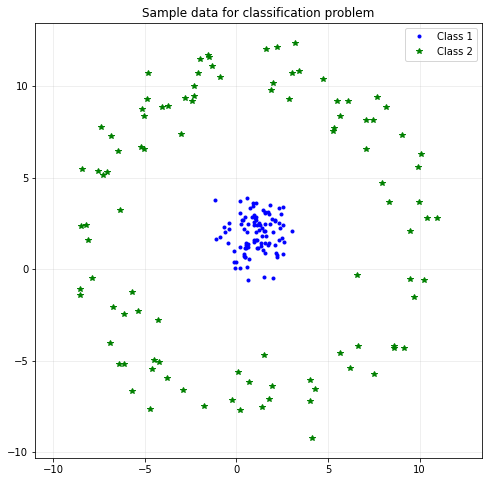

In [769]:
fig1 = plt.figure(figsize=(8,8))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here

# YOUR CODE HERE
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.legend()
# end plot graph
plt.axis('equal')
plt.show()

**Expect result (or looked alike):**

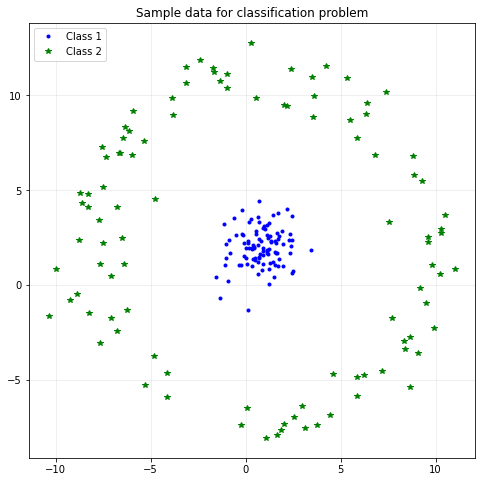

### Exercise 1.5 (5 points)

Split data into training and test datasets with 80% of training set and 20% of test set

In [770]:
import random

train_size = 0.8

idx_train = None
idx_test = None

X_train = None
X_test = None
y_train = None
y_test = None

# YOUR CODE HERE
m, n = X.shape
idx = np.arange(0, m)
random.seed(1412)
random.shuffle(idx)
m_train = int(m * train_size)
idx_train = idx[0:m_train]
idx_test = idx[m_train:]

X_train = X[idx_train,:];
X_test = X[idx_test,:];

y_train = y[idx_train];
y_test = y[idx_test];

In [771]:
print('idx_train:', idx_train[:10])
print("train size, X:", X_train.shape, ", y:", y_train.shape)
print("test size,  X:", X_test.shape,  ", y:", y_test.shape)

# Test function: Do not remove
assert X_train.shape == (160, 2), 'Size of X_train is incorrect'
assert y_train.shape == (160,) or y_train.shape == (160,1) or y.shape == 160, 'Size of y_train is incorrect'
assert X_test.shape == (40, 2), 'Size of X_test is incorrect'
assert y_test.shape == (40,) or y_test.shape == (40,1) or y.shape == 40, 'Size of y_test is incorrect'

print("success!")
# End Test function

idx_train: [188  57  88  34 192 138  62  93 160  38]
train size, X: (160, 2) , y: (160, 1)
test size,  X: (40, 2) , y: (40, 1)
success!


**Expect reult (Or looked alike):**\
idx_train: [ 78  61  28 166  80 143   6  76  98 133]\
train size, X: (160, 2) , y: (160, 1) \
test size,  X: (40, 2) , y: (40, 1)

### Exercise 1.6 (5 points)

Write the function which normalize X set

#### Practice yourself (No grade, but has extra score 3 points)

Try to use Jupyter notebook to write the normalize equation.

YOUR ANSWER HERE

#### Answer:

For feature $X_i$, if the dataset mean is $\mu_i$ and standard deviation is $\sigma_i$, feature $X_{i(normalized)}$ is:

$$X_{i(normalized)} = (X_i - \mu_i) / \sigma_i$$



In [772]:
def normalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    X_norm = None
    
    # YOUR CODE HERE
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm

In [773]:
XX = normalization(X)

X_train_norm = XX[idx_train]
X_test_norm = XX[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train = np.insert(X_train_norm,0,1,axis=1)
X_design_test = np.insert(X_test_norm,0,1,axis=1)

m,n = X_design_train.shape

print(X_train_norm.shape)
print(X_design_train.shape)
print(X_test_norm.shape)
print(X_design_test.shape)

# Test function: Do not remove
assert XX[:,0].min() >= -2.5 and XX[:,0].max() <= 2.5, 'Does the XX is normalized?'
assert XX[:,1].min() >= -2.5 and XX[:,1].max() <= 2.5, 'Does the XX is normalized?'

print("success!")
# End Test function

(160, 2)
(160, 3)
(40, 2)
(40, 3)
success!


### Exercise 1.7 (10 points)

define class for logistic regression: batch gradient descent

The class includes:

 - **Sigmoid** function $$sigmoid(z) = \frac{1}{1+e^{-z}}$$
 - **Softmax** function $$softmax(z) = \frac{e^{z_i}}{\sum_n{e^z}}$$
 - **Hyperthesis (h)** function $$\hat{y} = h(X;\theta) = softmax(\theta . X)$$
 - **Gradient (Negative likelihood)** function $$gradient = - X . \frac{y-\hat{y}}{n}$$
 - **Cost** function $$cost = \frac{\sum{((-y\log{\hat{y}}) - ((1-y)\log{(1 - \hat{y})})})}{n}$$
 - **Gradient ascent** function
 - **Prediction** function
 - **Get accuracy** funciton

In [774]:
class Logistic_BGD:
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1 / (1 + np.exp(-1*z))
        return s

    def softmax(self, z):
        sm = None
        # YOUR CODE HERE
        sm = np.exp(z) / np.sum(np.exp(z))
        return sm
    
    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE        
        z = np.dot(X,theta)
        hf = self.sigmoid(z)
        
        #hx = np.dot(X,theta)
        #hf = self.softmax(hx)
        return hf
    
    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        m = y.shape[0]
        grad = 1/m * np.dot((X*-1).T, (y - y_pred))
        return grad
        
    def costFunc(self, theta, X, y):
        cost = None
        grad = None
        # YOUR CODE HERE
        m = y.shape[0]
        y_pred = self.h(X, theta)
        sum_error = np.sum((-1*(y * np.log(y_pred)))-((1-y)*np.log(1-y_pred)))
        cost = 1/m * sum_error        
        
        grad = self.gradient(X, y, y_pred)        
        
        return cost, grad
    
    def gradientAscent(self, X, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # 1. calculate cost, grad function
            cost, grad = None, None
            # 2. update new theta
            #theta = None
            
            # YOUR CODE HERE            
            # 1. calculate cost, grad function
            cost, grad = self.costFunc(theta, X, y)
            # 2. update new theta
            theta = theta - alpha * grad
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:",J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # 1. take y_predict from hyperthesis function
        # 2. classify y_predict that what it should be class1 or class2
        # 3. append the output from prediction
        
        # YOUR CODE HERE
        m = X.shape[0]
        for i in range(m):
            # 1. take y_predict from hyperthesis function
            y_i = self.h(X[i], theta)
            # 2. classify y_predict that what it should be class1 or class2
            y_i_class = None
            if y_i >=  0.5:
                y_i_class = 1
            else:
                y_i_class = 0
            # 3. append the output from prediction
            labels.append(y_i_class)
                
        labels = np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        m = y.shape[0]
        num_correct = 0
        y_pred = self.predict(X,theta)
        for i in range(m):
            if y[i][0] == y_pred[i]:
                num_correct += 1
                
        percent_correct = (float(num_correct) / m) * 100                
        
        return percent_correct

In [775]:
# Test function: Do not remove
lbgd = Logistic_BGD()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
out_x1 = lbgd.softmax(out_x1)
out_x2 = lbgd.softmax(out_x2)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.16681682, 0.19376282, 0.20818183, 0.21440174, 0.21683678]], 5)), "softmax function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.gradientAscent(test_x, test_y, test_t, 0.001, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.29708373, 0.19781153]], 5)), "gradientAscent function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.86896665, 5), "gradientAscent function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_c 0.8719249134773479
Minimum at iteration: 2
test_t_out [[0.29708373 0.19781153]]
test_j [0.8719249134773479, 0.870441756946089, 0.8689666485816598]
test_l [1 1 1 1 1 1]
test_a 50.0
success!


**Expect result:**\
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
out_x1 [[0.16681682 0.19376282 0.20818183 0.21440174 0.21683678]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_c [0.87192491]\
Minimum at iteration: 2\
test_t_out [[0.29708373 0.19781153]]\
test_j [array([0.87192491]), array([0.87044176]), array([0.86896665])]\
test_l [1 1 1 1 1 1]\
test_a 50.0

### Exercise 1.8 (5 points)

Training the data using Logistic_BGD class.
 - Input: X_design_train
 - Output: y_train
 - Use 50,000 iterations
 
Find the initial_theta yourself

In [776]:
alpha = 0.001
iterations = 50000

BGD_model = None
initial_theta = None
bgd_theta, bgd_cost = None, None

# YOUR CODE HERE
BGD_model = Logistic_BGD()
m,n = X_design_train.shape
initial_theta = np.zeros((n, 1))
bgd_theta, bgd_cost = BGD_model.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)

Minimum at iteration: 49999


[[-0.02807944]
 [-0.18525799]
 [ 0.10517685]]
50000
0.6931471805599454


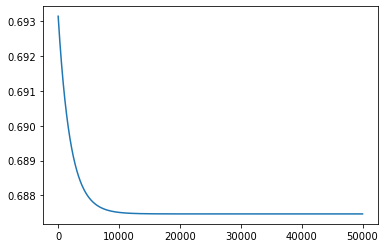

success!


In [777]:
print(bgd_theta)
print(len(bgd_cost))

print(bgd_cost[0])
plt.plot(bgd_cost)
plt.show()

# Test function: Do not remove
assert bgd_theta.shape == (X_train.shape[1] + 1,1) or bgd_theta.shape == (X_train.shape[1] + 1,) or bgd_theta.shape == X_train.shape[1] + 1, "theta shape is incorrect"
assert len(bgd_cost) == iterations, "cost data size is incorrect"

print("success!")
# End Test function

**Expect result (or look alike):**\
[[-0.07328673]\
 [-0.13632896]\
 [ 0.05430939]]\
50000

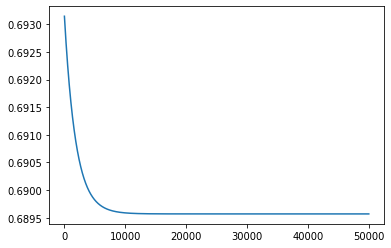

## In lab exercises

1. Verify that the gradient descent solution is correct. Plot the optimal decision boundary you obtain.

2. Write a new class that uses Newton's method for the optmization rather than simple gradient descent.

3. Verify that you obtain a similar solution with Newton's method. Plot the optimal decision boundary you obtain.

4. Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues
   with Newton's method such as a singular or nearly singular Hessian matrix?


### Exercise 1.9 (5 points)

Plot the optimal decision boundary of gradient ascent

#### Answer:

In logistic regression, $h_\theta(\textbf{x}) =  g(z) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$

where $z =  {\theta^\top \mathbf{x}}$

For binary classification problems, in which the target $y \in \{ 0, 1 \}$, we predict, $y = 1$ if  $h_\theta(\textbf{x}) \geq 0.5$

i.e. we predict, $y = 1$ if  $g(z) \geq 0.5$

$g(z) \geq 0.5$ when  ${\theta^\top \mathbf{x}} \geq 0$

Thus for binary classification problems, boundary is at  ${\theta^\top \mathbf{x}} = 0$

For a two-dimensional problem, ${\theta^\top \mathbf{x}} = \theta_0 + \theta_1x_1 + \theta_2x_2$

So we get, $\theta_0 + \theta_1x_1 + \theta_2x_2 = 0$

Thus for a two-dimensional binary classification problem, the decision boundary will be, $x_2 = -(\frac{\theta_0 + \theta_1x_1}{\theta_2})$

In [778]:
print(bgd_theta)

[[-0.02807944]
 [-0.18525799]
 [ 0.10517685]]


In [779]:
# YOUR CODE HERE
def decision_boundary_line(x_1, theta_0, theta_1, theta_2):
    """
    Limitation: This function will give the boundary line only for 
    two-dimensional binary classification problems
    """
    x_2 = (-1)*(theta_0 + theta_1*x_1)/(theta_2)
    return x_2
    

In [780]:
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
print(mean)
print(std)

[0.74488029 2.25132481]
[4.32369287 4.80392938]


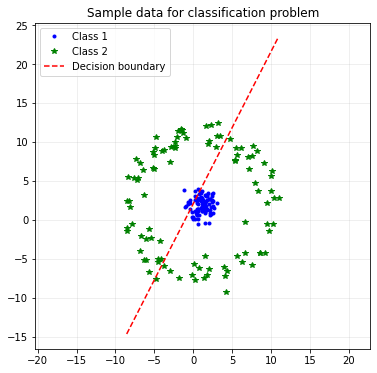

In [781]:
# Scatter plot
fig2 = plt.figure(figsize=(6,6))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.axis('equal')

# Decision boundary
x_1 = np.arange(XX[:,0].min(), XX[:,0].max(), 0.1)
theta_0 = bgd_theta[0][0]
theta_1 = bgd_theta[1][0]
theta_2 = bgd_theta[2][0]   
dbl = decision_boundary_line(x_1, theta_0, theta_1, theta_2)


# Removing normalization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x_1 = std[0]*x_1 + mean[0]
dbl = std[1]*dbl + mean[1]

plt.plot(x_1, dbl, 'r--', label="Decision boundary")
plt.legend()
plt.show()

**Expect result (or look alike):**\
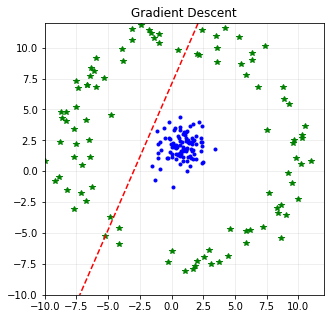

In [783]:
print("Accuracy =",BGD_model.getAccuracy(X_design_test,y_test,bgd_theta))

Accuracy = 70.0


### Exercise 2.1 (10 points)

Write Newton's method class

In [784]:
class Logistic_NM: #logistic regression for newton's method
      
    def __init__(self):
        pass
    
    def sigmoid(self,z):
        s = None
        # YOUR CODE HERE
        s = 1 / (1 + np.exp(-1*z))
        return s

    def h(self,X, theta):
        hf = None
        # YOUR CODE HERE
        z = np.dot(X,theta)
        hf = self.sigmoid(z)
        return hf

    def gradient(self, X, y, y_pred):
        grad = None
        # YOUR CODE HERE
        m = y.shape[0]
        grad = 1/m * np.dot((X*-1).T, (y - y_pred))
        return grad
        
    def hessian(self, X, y, theta):
        hess_mat = None
        # YOUR CODE HERE
        m,n  = X.shape
        hess_mat = np.zeros((X.shape[1], X.shape[1]))
        for i in range(m):
            xi = X[i]
            y_pred = self.h(xi,theta)
            xi = xi.reshape(-1,1) 
            hess_mat_xi = (y_pred) * (1-y_pred) * np.dot(xi, xi.T )
            hess_mat += hess_mat_xi 
        return hess_mat
        
    def costFunc(self, theta, X, y):   
        cost, grad = None, None
        # YOUR CODE HERE
        m = y.shape[0]
        y_pred = self.h(X, theta)
        sum_error = np.sum((-1*(y * np.log(y_pred)))-((1-y)*np.log(1-y_pred)))
        cost = 1/m * sum_error        
        
        grad = self.gradient(X, y, y_pred)        
        
        return cost, grad
    
    def newtonsMethod(self, X, y, theta, num_iters):
        m = len(y)
        J_history = []
        theta_history = []
        for i in range(num_iters):
            # YOUR CODE HERE
            hessian_mat = self.hessian(X, y, theta)
            cost, grad = self.costFunc(theta, X, y)            
            try : 
                theta = theta - np.dot(np.linalg.inv(hessian_mat), grad)
            except Exception as e : 
                error_msg = e
                print(f"Error: {e}")
                theta = theta - np.dot(np.linalg.pinv(hessian_mat), grad)
            
            J_history.append(cost)
            theta_history.append(theta)
        J_min_index = np.argmin(J_history)
        print("Minimum at iteration:", J_min_index)
        return theta_history[J_min_index] , J_history

    def predict(self,X, theta):
        labels=[]
        # YOUR CODE HERE
        m = X.shape[0]
        for i in range(m):
            # 1. take y_predict from hyperthesis function
            y_i = self.h(X[i], theta)
            # 2. classify y_predict that what it should be class1 or class2
            y_i_class = None
            if y_i >=  0.5:
                y_i_class = 1
            else:
                y_i_class = 0
            # 3. append the output from prediction
            labels.append(y_i_class)
        
        labels=np.asarray(labels)
        return labels
     
    def getAccuracy(self,X,y,theta):
        percent_correct = None
        # YOUR CODE HERE
        m = y.shape[0]
        num_correct = 0
        y_pred = self.predict(X,theta)
        for i in range(m):
            if y[i][0] == y_pred[i]:
                num_correct += 1
                
        percent_correct = (float(num_correct) / m) * 100                
        
        return percent_correct

In [785]:
# Test function: Do not remove
lbgd = Logistic_NM()
test_x = np.array([[1,2,3,4,5]]).T
out_x1 = lbgd.sigmoid(test_x)
out_x2 = lbgd.sigmoid(test_x.T)
print('out_x1', out_x1.T)
assert np.array_equal(np.round(out_x1.T, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
assert np.array_equal(np.round(out_x2, 5), np.round([[0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715]], 5)), "sigmoid function is incorrect"
test_t = np.array([[0.3, 0.2]]).T
test_x = np.array([[1,2,3,4,5, 6], [2, 9, 4, 3, 1, 0]]).T
test_y = np.array([[0,1,0,1,0,1]]).T
test_y_p = lbgd.h(test_x, test_t)
print('test_y_p', test_y_p.T)
assert np.array_equal(np.round(test_y_p.T, 5), np.round([[0.66818777, 0.9168273, 0.84553473, 0.85814894, 0.84553473, 0.85814894]], 5)), "hyperthesis function is incorrect"
test_g = lbgd.gradient(test_x, test_y, test_y_p)
print('test_g', test_g.T)
assert np.array_equal(np.round(test_g.T, 5), np.round([[0.9746016, 0.73165696]], 5)), "gradient function is incorrect"
test_h = lbgd.hessian(test_x, test_y, test_t)
print('test_h', test_h)
assert test_h.shape == (2, 2), "hessian matrix function is incorrect"
assert np.array_equal(np.round(test_h.T, 5), np.round([[12.17334371, 6.55487738],[ 6.55487738, 14.84880387]], 5)), "hessian matrix function is incorrect"
test_c, test_g = lbgd.costFunc(test_t, test_x, test_y)
print('test_c', test_c.T)
assert np.round(test_c, 5) == np.round(0.87192491, 5), "costFunc function is incorrect"
test_t_out , test_j = lbgd.newtonsMethod(test_x, test_y, test_t, 3)
print('test_t_out', test_t_out.T)
print('test_j', test_j)
assert np.array_equal(np.round(test_t_out.T, 5), np.round([[0.14765747, 0.15607017]], 5)), "newtonsMethod function is incorrect"
assert np.round(test_j[2], 5) == np.round(0.7534506190845247, 5), "newtonsMethod function is incorrect"
test_l = lbgd.predict(test_x, test_t)
print('test_l', test_l)
assert np.array_equal(np.round(test_l, 1), np.round([1,1,1,1,1,1], 1)), "gradientAscent function is incorrect"
test_a = lbgd.getAccuracy(test_x,test_y,test_t)
print('test_a', test_a)
assert np.round(test_a, 1) == 50.0, "getAccuracy function is incorrect"

print("success!")
# End Test function

out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]
test_g [[0.9746016  0.73165696]]
test_h [[11.29725396  5.49706551]
 [ 5.49706551 10.37936818]]


AssertionError: hessian matrix function is incorrect

**Expect result:**
out_x1 [[0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]]\
test_y_p [[0.66818777 0.9168273  0.84553473 0.85814894 0.84553473 0.85814894]]\
test_g [[0.9746016  0.73165696]]\
test_h [[12.17334371  6.55487738]\
 [ 6.55487738 14.84880387]]\
test_c 0.8719249134773479\
Minimum at iteration: 2\
test_t_out [[0.14765747 0.15607017]]\
test_j [0.8719249134773479, 0.7967484437157274, 0.7534506190845247]\
test_l [1 1 1 1 1 1]\
test_a 50.0

Minimum at iteration: 999
theta: [[-0.02802526]
 [-0.1848999 ]
 [ 0.10497439]]
0.6931471805599454


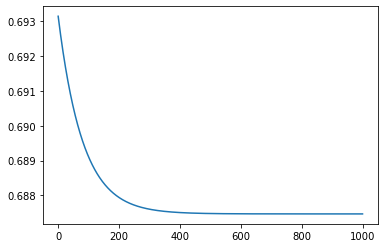

In [786]:
NM_model = Logistic_NM()

iterations = 1000

nm_theta, nm_cost = NM_model.newtonsMethod(X_design_train, y_train, initial_theta, iterations)
print("theta:",nm_theta)

print(nm_cost[0])
plt.plot(nm_cost)
plt.show()

**Expect result (or look alike):**\
Minimum at iteration: 999\
theta: [[-0.07313861]\
 [-0.13605172]\
 [ 0.05419746]]\
0.6931471805599453

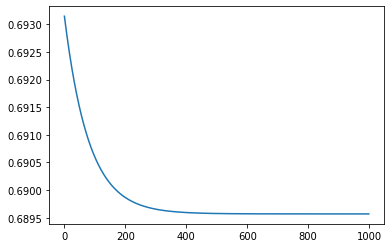

### Exercise 2.2 (5 points)

Plot the optimal decision boundary of Newton method

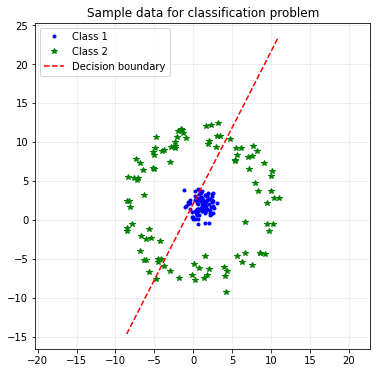

In [787]:
# YOUR CODE HERE
# Scatter plot
fig2 = plt.figure(figsize=(6,6))
ax = plt.axes() 
plt.title('Sample data for classification problem')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.plot(X1[:,0],X1[:,1],'b.', label = 'Class 1')
plt.plot(X2[:,0],X2[:,1],'g*', label = 'Class 2')
plt.axis('equal')

# Decision boundary
x_2 = np.arange(XX[:,0].min(), XX[:,0].max(), 0.1)
nm_theta_0 = nm_theta[0][0]
nm_theta_1 = nm_theta[1][0]
nm_theta_2 = nm_theta[2][0]   
nm_dbl = decision_boundary_line(x_2, nm_theta_0, nm_theta_1, nm_theta_2)


# Removing normalization
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x_2 = std[0]*x_2 + mean[0]
nm_dbl = std[1]*nm_dbl + mean[1]

plt.plot(x_2, nm_dbl, 'r--', label="Decision boundary")
plt.legend()
plt.show()

**Expect result (or look alike):**

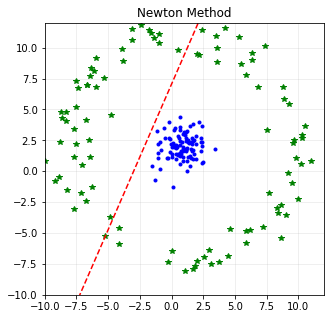

In [788]:
print("Accuracy =",NM_model.getAccuracy(X_design_test,y_test,nm_theta))

Accuracy = 70.0


### Exercise 2.3 (5 points)

Compare the number of iterations required for gradient descent vs. Newton's method. Do you observe other issues with Newton's method such as a singular or nearly singular Hessian matrix?

YOUR ANSWER HERE

### Answer:

#### Model Trainign Cost Comparison
- For easy comparison, I retrain the data with Batch gradient descent method and Newton's method using the same number of iterations (also with the same training dataset and `initial_theta`). 

In [789]:
alpha = 0.001
iterations = 15000
m,n = X_design_train.shape
initial_theta = np.zeros((n, 1))

In [790]:
BGD_model_2 = Logistic_BGD()

bgd_theta_2, bgd_cost_2 = BGD_model_2.gradientAscent(X_design_train, y_train, initial_theta, alpha, iterations)

Minimum at iteration: 14999


In [791]:
NM_model_2 = Logistic_NM()

nm_theta_2, nm_cost_2 = NM_model_2.newtonsMethod(X_design_train, y_train, initial_theta, iterations)

Minimum at iteration: 3552


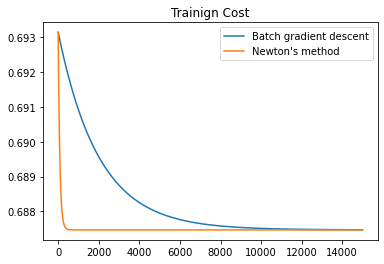

In [792]:
plt.title('Trainign Cost')
plt.plot(bgd_cost_2, label='Batch gradient descent')
plt.plot(nm_cost_2, label='Newton\'s method')

plt.legend()
plt.show()

In [793]:
print('Minimum cost - Batch gradient descent:', np.min(bgd_cost_2))
print('Minimum cost  - Newton\'s method :', np.min(nm_cost_2))

Minimum cost - Batch gradient descent: 0.6874698598834508
Minimum cost  - Newton's method : 0.687465867113375


#### Discussion:

- When trained using the same number of iterations (15000), we can see that in Batch gradient descent the minimum cost occurs at iteration index 14999, which is the last iteration. Thus for this training dataset in the case of Batch gradient descent, even at the last iteration, we are still minimizing the training cost

- But in the case of Newton's method, minimum cost occurs at an iteration index less than 4000. Thus optimizing the model 15000 times is too much.

- From these results, we can say that the model converges fast with Newton's method.

- But Newton's method depends on the Hessian matrix and calculating the Hessian matrix is costly.

- Further in Newton's method, when optimizing $\theta$ we need the inverse of the Hessian matrix ($\mathtt{H}^{-1}$) which will not exist in case $\mathtt{H}$ is singular. I did not encounter this problem with this dataset.


## Take-home exercises

1. Perform a *polar transformation* on the data above to obtain a linearly separable dataset. (5 points)

2. Verify that you obtain good classification accuracy for logistic regression with GD or Netwon's method
   after the polar transformation (10 points)
   
3. Apply Newton's method to the dataset you used for the take home exercises in Lab 03. (20 points)




### Answer:

#### Polar transformation

In [794]:
def cartesian_to_polar(X):
    x,y = X[:,0], X[:,1]
    t = np.arctan2(y,x)
    r = np.sqrt(x**2+y**2)    
    polar_X = np.array([t,r]).T
    return polar_X

In [795]:
polar_X = cartesian_to_polar(XX)
print("polar_X")
print(polar_X[:5])

polar_X
[[ 0.59716495  0.28921847]
 [-0.61731026  0.51607084]
 [ 2.39223822  0.12716596]
 [ 1.43347988  0.29088148]
 [ 2.07510249  0.14349587]]


In [796]:
X_train_polar = polar_X[idx_train]
X_test_polar = polar_X[idx_test]

# Add 1 at the first column of training dataset (for bias) and use it when training
X_design_train_polar = np.insert(X_train_polar,0,1,axis=1)
X_design_test_polar = np.insert(X_test_polar,0,1,axis=1)

print(X_design_train_polar.shape)
print(X_design_test_polar.shape)

(160, 3)
(40, 3)


In [797]:
alpha = 0.001
m,n = X_design_train_polar.shape
initial_theta = np.zeros((n, 1))

#### Applying Batch gradient descent to polar transformed data

In [798]:
iterations = 15000
BGD_model_3 = Logistic_BGD()

bgd_theta_3, bgd_cost_3 = BGD_model_3.gradientAscent(X_design_train_polar, y_train, initial_theta, alpha, iterations)

Minimum at iteration: 14999


#### Applying Newton's method to polar transformed data

In [799]:
iterations = 1500
NM_model_3 = Logistic_NM()

nm_theta_3, nm_cost_3 = NM_model_3.newtonsMethod(X_design_train_polar, y_train, initial_theta, iterations)

Minimum at iteration: 1499


#### Cost comparison between Batch gradient descent and Newton's method for polar transformed data

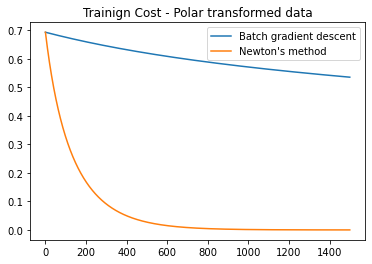

In [800]:
plt.title('Trainign Cost - Polar transformed data')
plt.plot(bgd_cost_3[:1500], label='Batch gradient descent')
plt.plot(nm_cost_3, label='Newton\'s method')

plt.legend()
plt.show()

In [801]:
print('Minimum cost - Polar transformed data - Batch gradient descent:', np.min(bgd_cost_3))
print('Minimum cost - Polar transformed data  - Newton\'s method :', np.min(nm_cost_3))

Minimum cost - Polar transformed data - Batch gradient descent: 0.21701130041433975
Minimum cost - Polar transformed data  - Newton's method : 6.882761433288636e-05


#### Accuracy comparison between Batch gradient descent and Newton's method for polar transformed data

In [802]:
print("Accuracy =",BGD_model_3.getAccuracy(X_design_test_polar,y_test,bgd_theta_3))

Accuracy = 100.0


In [803]:
print("Accuracy =",NM_model_3.getAccuracy(X_design_test_polar,y_test,nm_theta_3))

Accuracy = 100.0


#### Decision boundary for polar transformed data

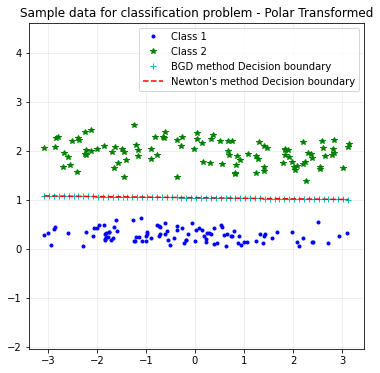

In [804]:
# Scatter plot
fig2 = plt.figure(figsize=(6,6))
ax = plt.axes() 
plt.title('Sample data for classification problem - Polar Transformed')
plt.grid(axis='both', alpha=.25)
# plot graph here
plt.plot(polar_X[:100,0],polar_X[:100,1],'b.', label = 'Class 1')
plt.plot(polar_X[100:,0],polar_X[100:,1],'g*', label = 'Class 2')
plt.axis('equal')


x_db_polar = np.arange(polar_X[:,0].min(), polar_X[:,0].max(), 0.1)
# Decision boundary - BGD method
bgd_theta_3_0 = bgd_theta_3[0][0]
bgd_theta_3_1 = bgd_theta_3[1][0]
bgd_theta_3_2 = bgd_theta_3[2][0]   
bgd_dbl_3 = decision_boundary_line(x_db_polar, bgd_theta_3_0, bgd_theta_3_1, bgd_theta_3_2)

# Decision boundary - Newton's method
nm_theta_3_0 = nm_theta_3[0][0]
nm_theta_3_1 = nm_theta_3[1][0]
nm_theta_3_2 = nm_theta_3[2][0]   
nm_dbl_3 = decision_boundary_line(x_db_polar, nm_theta_3_0, nm_theta_3_1, nm_theta_3_2)


# Removing normalization
# mean = np.mean(X, axis=0)
# std = np.std(X, axis=0)
# x_2 = std[0]*x_2 + mean[0]
# nm_dbl = std[1]*nm_dbl + mean[1]

plt.plot(x_db_polar, nm_dbl_3, 'c+', label="BGD method Decision boundary")
plt.plot(x_db_polar, nm_dbl_3, 'r--', label="Newton's method Decision boundary")
plt.legend()
plt.show()

#### Discussion:
- When data is polar transformed, both Batch gradient descent and Newton's method give 100 % accuracy for predictions on the test_data set. This is evident from the Decision boundary plot shown above as well. The new boundary lines clearly seperate the two classes.
- Also from the training cost plot, we can see, for Newton's method training cost stabilizes around 800 iterations when data is polar transformed compared to around 4000 iterations in non-polar transformed data.

### Apply Newton's method to the loan prediction dataset from Lab 03

#### Load data

In [805]:
import pandas as pd
import numpy as np
import random

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)

Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

#### Filling missing values

In [806]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [807]:
# Fill missing values - Married
print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [808]:
# Fill missing values - Dependents

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


In [809]:
# Fill missing values - LoanAmount

print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


In [810]:
# Fill missing values - Gender
print(data_train['Gender'].value_counts())

gender = data_train['Gender'].value_counts()
print('Elements in Gender variable', gender.shape)
print('Gender ratio ', gender[0]/sum(gender.values))


def fill_gender_status(data, male_num, female_num):    
    data['Gender'].fillna('Male',inplace=True, limit = male_num )
    data['Gender'].fillna('Female',inplace=True, limit = female_num)

Male      489
Female    112
Name: Gender, dtype: int64
Elements in Gender variable (2,)
Gender ratio  0.8136439267886856


In [811]:
male_num_train = 11
female_num_train = 13 - 11

male_num_test = 9
female_num_test = 11 - 9

print("male_num_train, female_num_train, male_num_test, female_num_test", 
      male_num_train, female_num_train, male_num_test, female_num_test)

fill_gender_status(data_train,male_num_train,female_num_train)
fill_gender_status(data_test,male_num_test,female_num_test)

print("Trainning:") 
print(data_train['Gender'].value_counts()) 
print("Testing:") 
print(data_test['Gender'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

male_num_train, female_num_train, male_num_test, female_num_test 11 2 9 2
Trainning:
Male      500
Female    114
Name: Gender, dtype: int64
Testing:
Male      295
Female     72
Name: Gender, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [812]:
# Fill missing values - Self_Employed
print(data_train['Self_Employed'].value_counts())

self_employed = data_train['Self_Employed'].value_counts()
print('Elements in Self Employed variable', self_employed.shape)
print('Self Employed ratio ', self_employed[0]/sum(self_employed.values))

def fill_selfemployed_status(data, not_self_emp_num, self_emp_num):        
    data['Self_Employed'].fillna('No', inplace = True, limit = not_self_emp_num)
    data['Self_Employed'].fillna('Yes', inplace = True, limit = self_emp_num) 

No     500
Yes     82
Name: Self_Employed, dtype: int64
Elements in Self Employed variable (2,)
Self Employed ratio  0.8591065292096219


In [813]:
not_self_emp_num_train = 27
self_emp_num_train = 32 -27

not_self_emp_num_test = 20
self_emp_num_test = 23 -20

print("not_self_emp_num_train, self_emp_num_train, not_self_emp_num_test, self_emp_num_test", 
      not_self_emp_num_train, self_emp_num_train, not_self_emp_num_test, self_emp_num_test)

fill_selfemployed_status(data_train,not_self_emp_num_train,self_emp_num_train)
fill_selfemployed_status(data_test,not_self_emp_num_test,self_emp_num_test)
print("Trainning:") 
print(data_train['Self_Employed'].value_counts()) 
print("Testing:") 
print(data_test['Self_Employed'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

not_self_emp_num_train, self_emp_num_train, not_self_emp_num_test, self_emp_num_test 27 5 20 3
Trainning:
No     527
Yes     87
Name: Self_Employed, dtype: int64
Testing:
No     327
Yes     40
Name: Self_Employed, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [814]:
# Fill missing values - Loan_Amount_Term

print(data_train['Loan_Amount_Term'].value_counts())

train_loan_amount_term_mean = np.mean(data_train["Loan_Amount_Term"])

#data_train['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 5)
#data_test['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 5)
data_train['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 15)
data_test['Loan_Amount_Term'].fillna(train_loan_amount_term_mean, inplace=True, limit = 10)


print("Trainning:") 
print(data_train['Loan_Amount_Term'].value_counts()) 
print("Testing:") 
print(data_test['Loan_Amount_Term'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Trainning:
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Testing:
360.0    311
180.0     22
480.0      8
300.0      7
342.0      6
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data:
---------------

In [815]:
# Fill missing values - Credit_History

print(data_train['Credit_History'].value_counts())

credit_history = data_train['Credit_History'].value_counts()
print('Elements in Credit_History variable', credit_history.shape)
print('Credit_History ratio ', credit_history[1]/sum(credit_history.values))


def fill_credit_history_status(data, credit_history_one_num, credit_history_zero_num):    
    data['Credit_History'].fillna(1.0,inplace=True, limit = credit_history_one_num )
    data['Credit_History'].fillna(0.0,inplace=True, limit = credit_history_zero_num)

1.0    475
0.0     89
Name: Credit_History, dtype: int64
Elements in Credit_History variable (2,)
Credit_History ratio  0.8421985815602837


In [816]:
credit_history_one_num_train = 42
credit_history_zero_num_train = 50 - 42

credit_history_one_num_test = 24
credit_history_zero_num_test = 29 -24

print("credit_history_one_num_train, credit_history_zero_num_train, credit_history_one_num_test, credit_history_zero_num_test", 
      credit_history_one_num_train, credit_history_zero_num_train, credit_history_one_num_test, credit_history_zero_num_test)

fill_credit_history_status(data_train,credit_history_one_num_train,credit_history_zero_num_train)
fill_credit_history_status(data_test,credit_history_one_num_test,credit_history_zero_num_test)

print("Trainning:") 
print(data_train['Credit_History'].value_counts()) 
print("Testing:") 
print(data_test['Credit_History'].value_counts())
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data:\n------------------------\n', data_test.isnull().sum())

credit_history_one_num_train, credit_history_zero_num_train, credit_history_one_num_test, credit_history_zero_num_test 42 8 24 5
Trainning:
1.0    517
0.0     97
Name: Credit_History, dtype: int64
Testing:
1.0    303
0.0     64
Name: Credit_History, dtype: int64
Missing values for train data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Missing values for test data:
------------------------
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### Converting categorical data to numerical

In [817]:
print("Trainning\n-----------")
print(data_train.info(),"\n")
print("Testing\n-----------")
print(data_test.info(),"\n")

Trainning
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None 

Testing
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 

In [818]:
# Converting type - Gender
data_train['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)

data_test['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Gender'])
print("Testing:") 
print(data_test.dtypes['Gender'])

Trainning:
int64
Testing:
int64


In [819]:
# Converting type - Married
data_train['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)

data_test['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Married'])
print("Testing:") 
print(data_test.dtypes['Married'])

Trainning:
int64
Testing:
int64


In [820]:
# Converting type - Dependents
data_train['Dependents'] = data_train['Dependents'].astype(int)

data_test['Dependents'] = data_test['Dependents'].astype(int)

print("Trainning:") 
print(data_train.dtypes['Dependents'])
print("Testing:") 
print(data_test.dtypes['Dependents'])


Trainning:
int64
Testing:
int64


In [821]:
# Converting type - Education
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)

data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Education'])
print("Testing:") 
print(data_test.dtypes['Education'])

Trainning:
int64
Testing:
int64


In [822]:
# Converting type - Self_Employed
data_train['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)

data_test['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Self_Employed'])
print("Testing:") 
print(data_test.dtypes['Self_Employed'])

Trainning:
int64
Testing:
int64


In [823]:
# Converting type - Property_Area
print("Trainning:") 
print(data_train['Property_Area'].value_counts()) 
print("Testing:") 
print(data_test['Property_Area'].value_counts())

Trainning:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Testing:
Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64


In [824]:
data_train['Property_Area'].replace('Urban', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Rural', 2, inplace = True)

data_test['Property_Area'].replace('Urban', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Rural', 2, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Property_Area'])
print("Testing:") 
print(data_test.dtypes['Property_Area'])

Trainning:
int64
Testing:
int64


In [825]:
# Converting type - Loan_Status
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)

print("Trainning:") 
print(data_train.dtypes['Loan_Status'])

Trainning:
int64


#### Extracting X and y

In [826]:
X = data_train.iloc[:,1:12].to_numpy()
y = data_train.iloc[:,-1].to_numpy()
m,n = X.shape
y = y.reshape(m,1)

print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (614, 11)
y.shape (614, 1)


#### Normalizing the data

In [827]:
X_norm = (X - np.mean(X, axis = 0))/ np.std(X, axis = 0)

#### Train test split

In [828]:
m, n = X_norm.shape
idx = np.arange(0, m)
random.seed(1234)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = X_norm[train_idx,:];
X_test = X_norm[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(368, 11) (246, 11) (368, 1) (246, 1)


In [829]:
X_design_train = np.insert(X_train,0,1,axis=1)
X_design_test = np.insert(X_test,0,1,axis=1)

print(X_design_train.shape, X_design_test.shape, y_train.shape, y_test.shape)

(368, 12) (246, 12) (368, 1) (246, 1)


#### Training using the Newton's method

In [830]:
m,n = X_design_train.shape
initial_theta = np.zeros((n, 1))


iterations = 1500
NM_model_4 = Logistic_NM()

nm_theta_4, nm_cost_4 = NM_model_4.newtonsMethod(X_design_train, y_train, initial_theta, iterations)

Minimum at iteration: 1499


#### Training cost plot

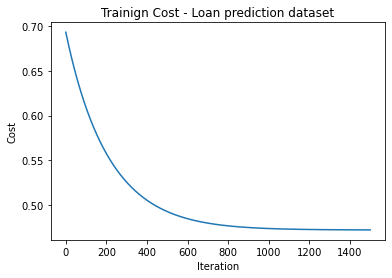

In [831]:
plt.title('Trainign Cost - Loan prediction dataset')
plt.plot(nm_cost_4)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

In [832]:
print('Minimum cost - Loan prediction dataset  - Newton\'s method :', np.min(nm_cost_4))

Minimum cost - Loan prediction dataset  - Newton's method : 0.47212350915444523


In [833]:
acc_nm_4 = NM_model_4.getAccuracy(X_design_test, y_test,nm_theta_4)
print("Accuracy - Loan prediction dataset: ", acc_nm_4)

Accuracy - Loan prediction dataset:  80.48780487804879


#### Discussion:
- In this exercise, I trained the loan prediction dataset using Newton's method.
- The resulting accuracy is for test dataset is 80.4878 %, which is the same accuracy achieved in Lab-03. But when Newton's method is used this same level of accuracy is achieved using fewer number of iterations (From the training cost plot we can see that the cost stabilizers around 100 iterations).


## The report

Write a brief report covering your experiments (both in lab and take home) and send as a Jupyter notebook
to the TAs, Manish and Abhishek before the next lab.

In your solution, be sure to follow instructions.

### Answer:

- In this lab class I compared with Batch gradient descent and Newton's method in two nonlinear optimization problems.

- From our experiments, we can see that, using both Batch gradient descent and Newton's method we can reach the same level of accuracy.

- For both datasets, we can see that the model converges faster (in fewer iterations) when Newton's method is used.

- But from the code, we can see that Newton's method depends on the Hessian matrix and calculating the Hessian matrix is costly.

- Further in Newton's method, when optimizing $\theta$ we need the inverse of the Hessian matrix ($\mathtt{H}^{-1}$) which will not exist in case $\mathtt{H}$ is singular. Even though I did not encounter this problem with the two dataset used in the exersices, sometimes this can happen.

- From the first dataset, we can also see that in logistic regression better classification results can be achieved by transforming the data into a different representation (example: polar transformation).